# TP Perceptron:

El archivo ingresos.xlsx contiene informacion sobre un conjunto de individuos, en funcion de su edad,
su nivel educativo y la cantidad de horas que trabaja por semana.
El ingreso esta codificado de la siguiente manera:

0 = gana menos de 50K anuales
1 = gana mas de 50 K anulaes

Se pide:

a) Analizar el contenido del archivo:


b)Entrenar un perceptron que permita determinar a partir de la edad y el nivel educativo,si un individuo posee
ingresos mayores a 50 K anuales


c) Ejecute varios entrenamiento del perceptron con diferentes valores de Alfa y observe la recta discriminante
resultante seleccionando los parametros que resultan en un mejor clasificador


d)A partir de perceptron entrenado anteriormente, realice la prediccion del ingreso de los individuos que se
encuentran en en el archivo IngresosDesconocidos.xlsx


Nota: La columna de horas que trabaja debe ser ignorada

### a) Analizar el contenido del archivo:

In [ ]:
!pip install openpyxl


[notice] A new release of pip is available: 23.0.1 -> 24.1
[notice] To update, run: pip install --upgrade pip


In [ ]:
import pandas as pd
ingresos = 'Ingresos.xlsx'
df= pd.read_excel(ingresos)
df

Edad  Nivel Educativo (máximo valor = postgrado)  \
0      33                                          13   
1      20                                           9   
2      22                                           9   
3      19                                          10   
4      34                                          13   
..    ...                                         ...   
884    51                                          10   
885    44                                          13   
886    29                                          13   
887    47                                          13   
888    50                                          16   

     Hs.que trabaja x semana  Gana más de 50K anuales? (1=si)  
0                         25                                1  
1                         30                                0  
2                         33                                0  
3                         40                                0  
4                         45                                1  
..                       ...                              ...  
884                       48                                1  
885                       50                                1  
886                       40                                1  
887                       50                                1  
888                       50                                1  

[889 rows x 4 columns]

El archivo consta de 89 paginas de 889 filas y 4 columnas

In [ ]:
print(df.dtypes)

Edad                                          int64
Nivel Educativo (máximo valor = postgrado)    int64
Hs.que trabaja x semana                       int64
Gana más de 50K anuales? (1=si)               int64
dtype: object


Los datos estan en int64  no se necesita formatear

Importo Sklearn learn para clasificar por la edad y nivel educativo, y predecir  los ingresos mayores o menores a 50K

In [ ]:
import sklearn

Creo las variables independientes y dependientes  de entrenamiento

In [ ]:
X = df[['Edad', 'Nivel Educativo (máximo valor = postgrado)']]
y = df['Gana más de 50K anuales? (1=si)']

Divido los datos de entrenamiento y prueba  Uso el 20% para el testeo de datos

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

Compruebo las variables de entrenamiento y prueba

In [ ]:
X_test

Edad  Nivel Educativo (máximo valor = postgrado)
405    55                                          15
447    40                                          13
186    25                                          10
573    45                                          13
271    56                                          10
..    ...                                         ...
141    48                                          15
594    37                                           7
100    52                                          13
352    40                                          11
10     58                                           9

[178 rows x 2 columns]

In [ ]:
X_train

Edad  Nivel Educativo (máximo valor = postgrado)
89     30                                           9
540    31                                          14
118    51                                          13
223    24                                          10
549    18                                           9
..    ...                                         ...
288    29                                          13
613    54                                          10
263    59                                          10
460    40                                          13
571    57                                          14

[711 rows x 2 columns]

In [ ]:
y_test

405    1
447    1
186    0
573    1
271    1
      ..
141    1
594    0
100    1
352    1
10     1
Name: Gana más de 50K anuales? (1=si), Length: 178, dtype: int64

In [ ]:
y_train

89     0
540    1
118    1
223    0
549    0
      ..
288    1
613    1
263    1
460    1
571    1
Name: Gana más de 50K anuales? (1=si), Length: 711, dtype: int64

Toma 711 filas para el entrenamiento  (80%)  y 178 para test (20%)

Importo  perceptron de skearn learn

In [ ]:
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split

import joblib
import numpy as np

perceptron = Perceptron(eta0=0.1, max_iter=1000, tol=1e-3, random_state=42)
perceptron.fit(X_train, y_train)

precision = perceptron.score(X_test, y_test)
print(f"Precisión: {precision}")


joblib.dump(perceptron, 'perceptron_model.pkl')



Precisión: 1.0


['perceptron_model.pkl']

### c) Ejecute varios entrenamiento del perceptron con diferentes valores de Alfa y observe la recta discriminante
resultante seleccionando los parametros que resultan en un mejor clasificador

Esto es precision: 1.0
Esto es precision: 1.0
Esto es precision: 1.0


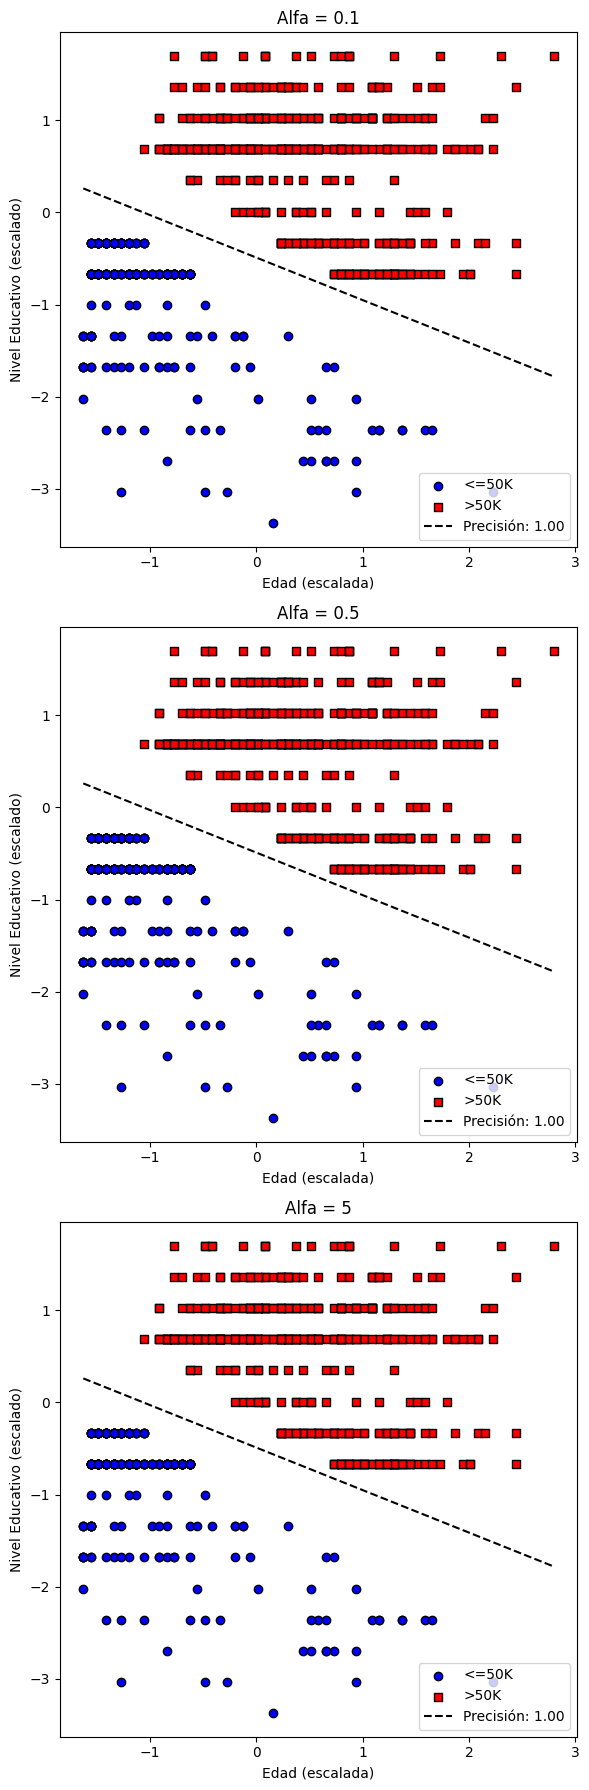

IndexError: invalid index to scalar variable.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_transformed = scaler.fit_transform(X_train)
X_test_transformed = scaler.transform(X_test)

alfa_aprendizaje = [0.1, 0.5, 5]

fig, axs = plt.subplots(len(alfa_aprendizaje), figsize=(6, 6 * len(alfa_aprendizaje)))
if len(alfa_aprendizaje) == 1:
    axs = [axs]

for i, alfa in enumerate(alfa_aprendizaje):
    perceptron = Perceptron(eta0=alfa, max_iter=1000, tol=1e-3, random_state=42)
    perceptron.fit(X_train_transformed, y_train)
    precision = perceptron.score(X_test_transformed, y_test)
    print("Esto es precision:", precision)

    w = perceptron.coef_[0]
    b = perceptron.intercept_[0]

    for label, marker, color, label_text in zip([0, 1], ['o', 's'], ['blue', 'red'], ['<=50K', '>50K']):
        subset = X_train_transformed[y_train == label]
        axs[i].scatter(subset[:, 0], subset[:, 1], marker=marker, color=color, edgecolors='k', label=f'{label_text}')

    slope = -w[0] / w[1]
    intercept = -b / w[1]

    x_values = np.linspace(X_train_transformed[:, 0].min(), X_train_transformed[:, 0].max(), 100)
    y_values = slope * x_values + intercept
    axs[i].plot(x_values, y_values, color='black', linestyle='--', label=f'Precisión: {precision:.2f}')

    axs[i].set_title(f'Alfa = {alfa}')
    axs[i].set_xlabel('Edad (escalada)')
    axs[i].set_ylabel('Nivel Educativo (escalado)')
    axs[i].legend()

plt.tight_layout()
plt.show()

mejor_precision = precision.max()
mejor_tasa_aprendizaje = precision[mejor_precision]
#mejor_tasa_aprendizaje = tasas_aprendizaje_utilizadas[precisiones.index(mejor_precision)]
print(f"Mejor Tasa de aprendizaje: {mejor_tasa_aprendizaje}, Mejor Precisión: {mejor_precision:.2f}")

In [ ]:
! pip install openpyxl


[notice] A new release of pip is available: 23.0.1 -> 24.1
[notice] To update, run: pip install --upgrade pip


### d) A partir de perceptron entrenado anteriormente, realice la prediccion del ingreso de los individuos que se
encuentran en en el archivo IngresosDesconocidos.xlsx


In [ ]:
import pandas as pd
ingresos = 'IngresosDesconocidos.xlsx'
df1= pd.read_excel(ingresos)
df1

Edad  Nivel Educativo (máximo valor = postgrado)
0     36                                          13
1     29                                          13
2     34                                          11
3     30                                          10
4     23                                          13
5     46                                          10
6     34                                          13
7     21                                          10
8     20                                          10
9     62                                           9
10    50                                          13
11    31                                          13
12    33                                           9
13    45                                           9
14    38                                          13
15    30                                          11
16    30                                           9
17    24                                           9
18    46                                          12
19    45                                          14
20    52                                           9
21    31                                          10
22    46                                           9
23    28                                          13
24    25                                          13
25    52                                           9
26    59                                           9
27    59                                          16
28    42                                          13
29    41                                           9
30    37                                           6
31    33                                          13
32    17                                           6
33    62                                           9
34    50                                           9
35    52                                           9
36    48                                           9
37    53                                          10
38    50                                           9
39    42                                          10
40    63                                           7
41    31                                          13
42    62                                          10

El archivo consta de 5 paginas con 2 columnas de 43 filas

In [ ]:
import pandas as pd

print(df1.dtypes)

Edad                                          int64
Nivel Educativo (máximo valor = postgrado)    int64
dtype: object


Los datos estan en int64 no necesito limpiarlos

Importo el perceptron previamente entrenado usando jolib

In [ ]:
import pandas as pd
import joblib

perceptron = joblib.load('perceptron_model.pkl')

ingresos = 'IngresosDesconocidos.xlsx'
df1 = pd.read_excel(ingresos)

X_nuevo = df1[['Edad', 'Nivel Educativo (máximo valor = postgrado)']]
y_pred_nuevo = perceptron.predict(X_nuevo)

df1['Ingresos_Predichos'] = y_pred_nuevo
print("DataFrame con predicciones:")
print(df1)
df1.to_excel('IngresosDesconocidos_Con_Predicciones.xlsx', index=False)

DataFrame con predicciones:
    Edad  Nivel Educativo (máximo valor = postgrado)  Ingresos_Predichos
0     36                                          13                   1
1     29                                          13                   1
2     34                                          11                   1
3     30                                          10                   0
4     23                                          13                   1
5     46                                          10                   1
6     34                                          13                   1
7     21                                          10                   0
8     20                                          10                   0
9     62                                           9                   1
10    50                                          13                   1
11    31                                          13                   1
12    33               

2  Se desea comparar dos especies de avispas: Chaqueta Amarilla y Negra Pequeña consideando la longitud de antena en milimetros y longitud de la pata en milimetros. Se cuenta con un registro de 15 individuos de estos insectos en el archivo Avispas,csv

a) Analiza el contenido del archivo

b) Realizar la limpieza y las transformaciones necesarias para obtener una matriz numerica

c) Entrenar un percepton que permita detectar si un individuo dado es una Chaqueta Amarilla o una Negra Pequeña a partir de la longitud de su antena o pata

d) Si se tiene un nuevo individuo cuya longitud de antena es de 1,25 y su longitud de la pata es de 1,8, utilice el perceptron entrenado para determinar a que grupo pertenece

a) Analiza el contenido del archivo

In [ ]:
import pandas as pd
df2 = pd.read_csv('avispas.csv', sep = ';')
df2

Longitud de antena Longitud de Pata           Variedad
0                1,38             1,64  Chaqueta amarilla
1                1,39             1,71  Chaqueta amarilla
2                1,23             1,72  Chaqueta amarilla
3                1,36             1,74  Chaqueta amarilla
4                1,38             1,82  Chaqueta amarilla
5                1,48             1,82  Chaqueta amarilla
6                1,54             1,81  Chaqueta amarilla
7                1,38              1,9  Chaqueta amarilla
8                1,56             2,07  Chaqueta amarilla
9                1,14             1,78      Negra Pequeña
10               1,21             1,86      Negra Pequeña
11               1,18             1,96      Negra Pequeña
12               1,28             1,96      Negra Pequeña
13               1,26              2,1      Negra Pequeña
14               1,29              1,9      Negra Pequeña

El archivo consta de 2 paginas con 3 columnas de 15 filas

In [ ]:
print(df2.dtypes)

Longitud de antena    object
Longitud de Pata      object
Variedad              object
dtype: object


Los datos son tipo object y debo formatearlos

In [ ]:
print(df2['Variedad'])

0     Chaqueta amarilla
1     Chaqueta amarilla
2     Chaqueta amarilla
3     Chaqueta amarilla
4     Chaqueta amarilla
5     Chaqueta amarilla
6     Chaqueta amarilla
7     Chaqueta amarilla
8     Chaqueta amarilla
9         Negra Pequeña
10        Negra Pequeña
11        Negra Pequeña
12        Negra Pequeña
13        Negra Pequeña
14        Negra Pequeña
Name: Variedad, dtype: object


En la columna 'Variedad' elimino los espacios en blanco y mapeo un diccionario para darle el valor 1 o 0 a cada categoria de avispa

In [ ]:
import pandas as pd

df2['Variedad'] = df2['Variedad'].astype(str).str.strip()
diccionario_mapeo = {'Chaqueta amarilla': 1, 'Negra Pequeña': 0}
df2['Variedad'] = df2['Variedad'].map(diccionario_mapeo)
print(df2['Variedad'])

0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     0
10    0
11    0
12    0
13    0
14    0
Name: Variedad, dtype: int64


Convierto los datos en float

In [ ]:
import pandas as pd

columns_to_convert = ['Longitud de antena', 'Longitud de Pata']
for col in columns_to_convert:
    df2[col] = df2[col].str.replace(',', '.').astype(float)

print(df2[columns_to_convert])

    Longitud de antena  Longitud de Pata
0                 1.38              1.64
1                 1.39              1.71
2                 1.23              1.72
3                 1.36              1.74
4                 1.38              1.82
5                 1.48              1.82
6                 1.54              1.81
7                 1.38              1.90
8                 1.56              2.07
9                 1.14              1.78
10                1.21              1.86
11                1.18              1.96
12                1.28              1.96
13                1.26              2.10
14                1.29              1.90


Creo la variable independiente

In [ ]:
X = df2[['Longitud de Pata', 'Longitud de antena']]

In [ ]:
X

Longitud de Pata  Longitud de antena
0               1.64                1.38
1               1.71                1.39
2               1.72                1.23
3               1.74                1.36
4               1.82                1.38
5               1.82                1.48
6               1.81                1.54
7               1.90                1.38
8               2.07                1.56
9               1.78                1.14
10              1.86                1.21
11              1.96                1.18
12              1.96                1.28
13              2.10                1.26
14              1.90                1.29

Creo mi variable dependiente

In [ ]:
y = df2['Variedad']
y

0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     0
10    0
11    0
12    0
13    0
14    0
Name: Variedad, dtype: int64

Entreno el perceptron y lo guardo

In [ ]:
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df2[['Longitud de Pata', 'Longitud de antena']]
y = df2['Variedad']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state = 12)
perceptron = Perceptron(eta0=0.1, max_iter=1000, tol=1e-3, random_state=12)
perceptron.fit(X_train, y_train)
precision = perceptron.score(X_test, y_test)

print(f"Precisión: {precision}")

joblib.dump(perceptron, 'perceptron_avispa_model.pkl')
scaler_avispa = StandardScaler()
X_train_std = scaler_avispa.fit_transform(X_train)
print(X_train_std)
X_test_std = scaler_avispa.fit_transform(X_test)
print("Esto es X_Test\n", X_test_std)
#scaler_avispa.fit_transform(X_train)
joblib.dump(scaler_avispa, 'scaler_avispa.pkl')


Precisión: 0.6666666666666666
[[-0.04163054  1.28945154]
 [ 0.62445817  0.4052562 ]
 [ 2.28967996 -0.65577821]
 [-1.54033015  0.4052562 ]
 [-0.04163054  0.4052562 ]
 [-0.3746749  -1.71681262]
 [-0.70771926  0.22841713]
 [-0.87424144 -0.92103681]
 [-0.95750253  0.49367573]
 [-0.12489163  1.81996874]
 [ 0.62445817 -0.39051961]
 [ 1.12402471 -1.36313448]]
Esto es X_Test
 [[-0.0388661  -0.46291005]
 [-1.20484922 -0.9258201 ]
 [ 1.24371532  1.38873015]]


['scaler_avispa.pkl']

### d) Si se tiene un nuevo individuo cuya longitud de antena es de 1,25 y su longitud de la pata es de 1,8, utilice el perceptron entrenado para determinar a que grupo pertenece

Importo el perceptron entrenado previamente

In [ ]:
import joblib

perceptron = joblib.load('perceptron_avispa_model.pkl')
scaler = joblib.load('scaler_avispa.pkl')
print(scaler)

nuevo_individuo = [[1.8, 1.25]]
print(nuevo_individuo)

nuevo_individuo_escalado = scaler.fit_transform([[1.8, 1.25]])
print(nuevo_individuo_escalado)
prediccion = perceptron.predict(nuevo_individuo)

print (prediccion)

if prediccion == 1:
    print("El nuevo individuo pertenece al grupo Chaqueta Amarilla")
else:
    print("El nuevo individuo pertenece al grupo Pequeña Negra")

StandardScaler()
[[1.8, 1.25]]
[[0. 0.]]
[0]
El nuevo individuo pertenece al grupo Pequeña Negra
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but Perceptron was fitted with feature names
  warnings.warn(
